In [1]:
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from zipfile import ZipFile
from keras.models import model_from_json
from tensorflow.keras.preprocessing.image import load_img
import os
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [2]:
file_name = "viskom.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print("Done")

Done


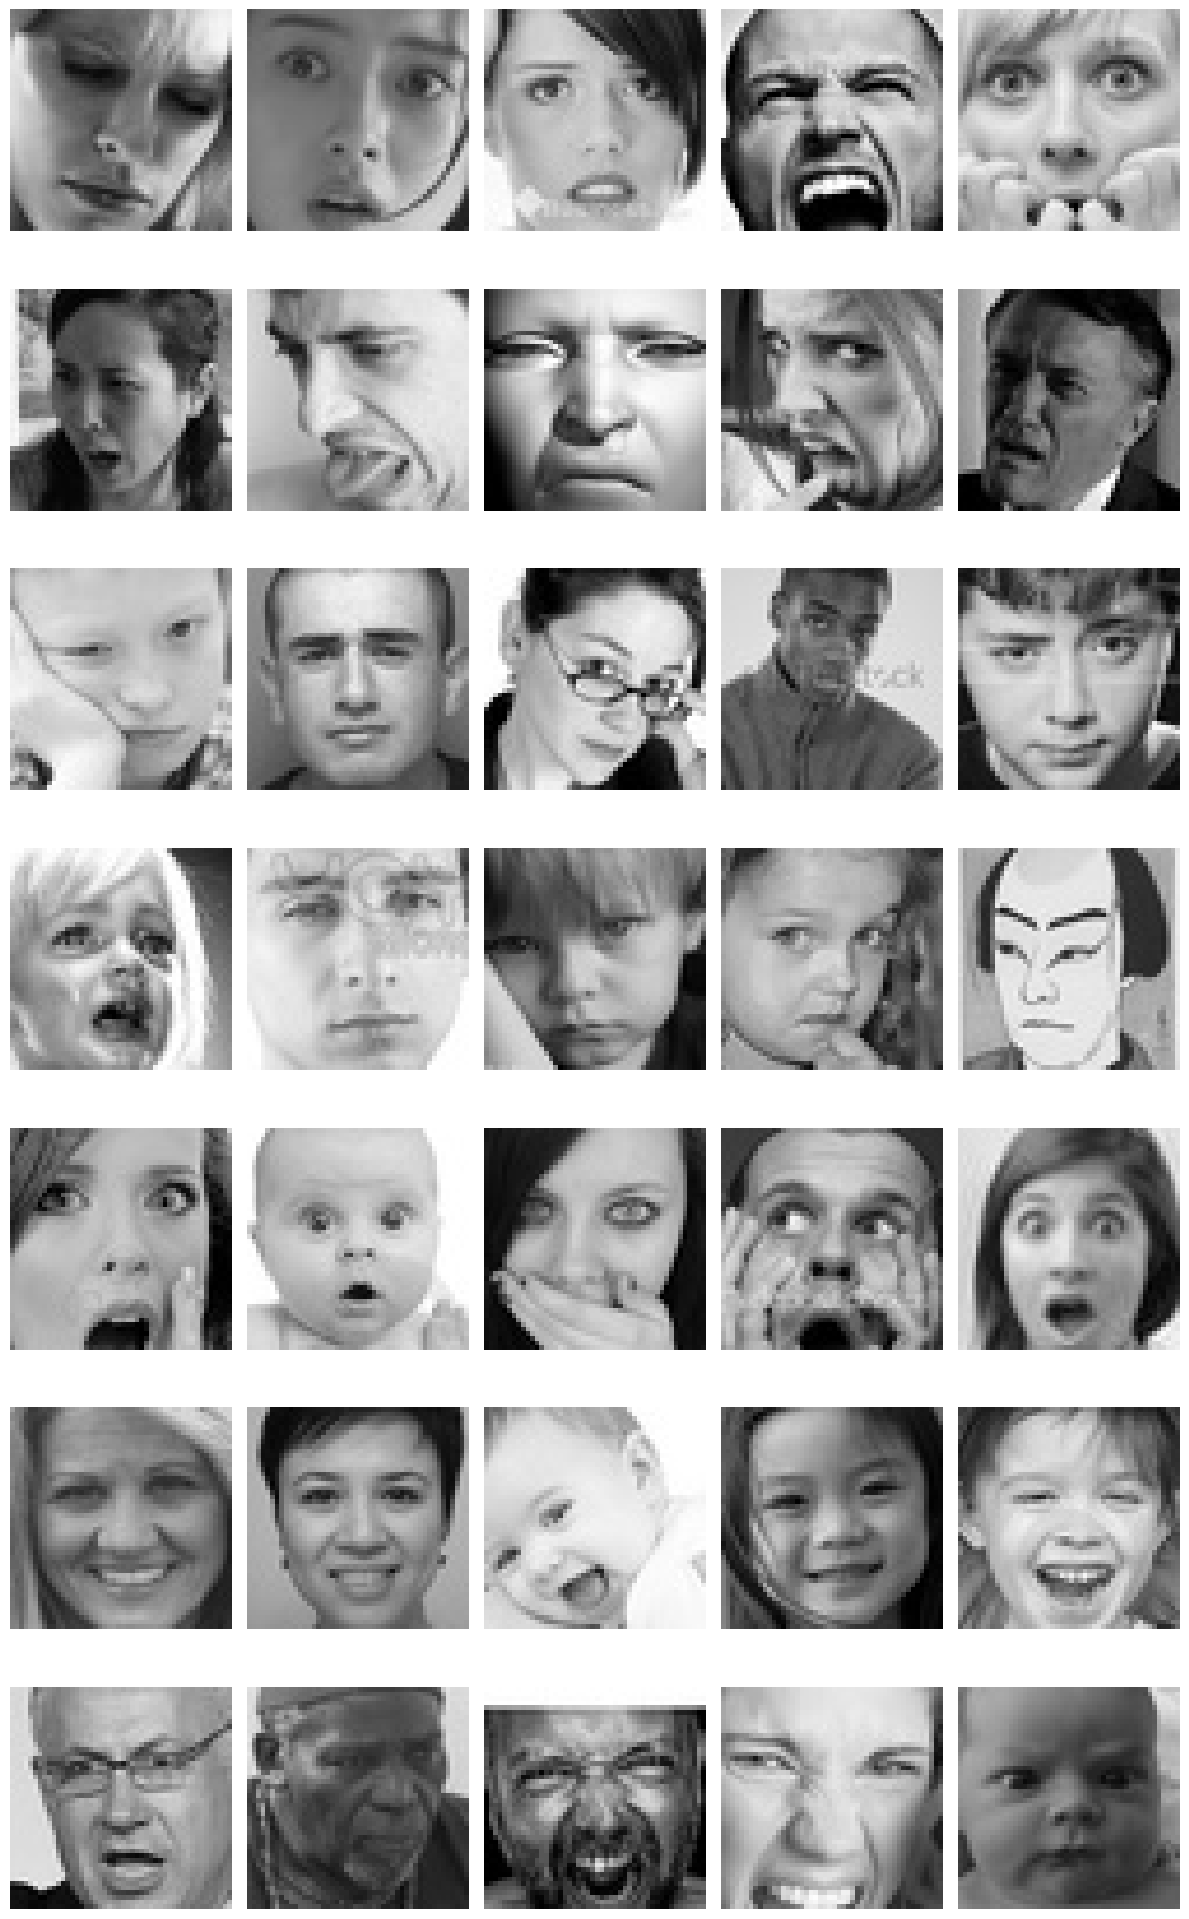

In [3]:
plt.figure(0, figsize=(12, 20))
cpt = 0

# Loop untuk menampilkan beberapa gambar dari setiap ekspresi
for expression in os.listdir("train/"):
    for i in range(1, 6):
        cpt += 1
        plt.subplot(7, 5, cpt)
        img_path = os.path.join("train", expression, os.listdir(os.path.join("train", expression))[i])
        img = load_img(img_path, target_size=(48, 48))
        plt.imshow(img, cmap="gray")
        plt.axis("off")

plt.tight_layout()
plt.show()


In [4]:
train_data_gen = ImageDataGenerator(rescale=1./255)
validation_data_gen = ImageDataGenerator(rescale=1./255)


train_generator = train_data_gen.flow_from_directory(
        'train',
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical'
        )



validation_generator = validation_data_gen.flow_from_directory(
        'test',
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical'
        )

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [5]:
emotion_model = Sequential()

emotion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))
emotion_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))

emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))

emotion_model.add(Flatten())
emotion_model.add(Dense(1024, activation='relu'))
emotion_model.add(Dropout(0.5))
emotion_model.add(Dense(7, activation='softmax'))

cv2.ocl.setUseOpenCL(False)

emotion_model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001, decay=1e-6), metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [6]:
emotion_model_info = emotion_model.fit(
        train_generator,
        steps_per_epoch=28709 // 64,
        epochs=50,
        validation_data=validation_generator,
        validation_steps=7178 // 64)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


448/448 ━━━━━━━━━━━━━━━━━━━━ 28s 46ms/step - accuracy: 0.2427 - loss: 1.8300 - val_accuracy: 0.3382 - val_loss: 1.7068
Epoch 2/50
  1/448 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.2188 - loss: 1.6608

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.2188 - loss: 1.6608 - val_accuracy: 0.3000 - val_loss: 1.5546
Epoch 3/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 15s 34ms/step - accuracy: 0.3410 - loss: 1.6717 - val_accuracy: 0.4009 - val_loss: 1.5650
Epoch 4/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3906 - loss: 1.5693 - val_accuracy: 0.4000 - val_loss: 1.4689
Epoch 5/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - accuracy: 0.4016 - loss: 1.5601 - val_accuracy: 0.4330 - val_loss: 1.4802
Epoch 6/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 38us/step - accuracy: 0.4375 - loss: 1.6495 - val_accuracy: 0.2000 - val_loss: 1.6762
Epoch 7/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.4276 - loss: 1.4955 - val_accuracy: 0.4551 - val_loss: 1.4222
Epoch 8/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4531 - loss: 1.4661 - val_accuracy: 0.6000 - val_loss: 1.2302
Epoch 9/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 18s 34ms/step - accuracy: 0.4469 - loss: 1.4427 - val_accuracy: 0.47

In [7]:
model_json = emotion_model.to_json()
with open("emotion_model.json", "w") as json_file:
    json_file.write(model_json)

In [8]:
emotion_model.save_weights('/content/emotion_model.weights.h5')


Loaded model from disk
Found 7178 images belonging to 7 classes.
113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step
-----------------------------------------------------------------
[[ 496   10   81   44  112  198   17]
 [  28   50   11    2    4   13    3]
 [ 118    5  357   58  134  261   91]
 [  62    0   43 1430  116   96   27]
 [  81    5   71   90  729  243   14]
 [ 134    1  113   78  224  681   16]
 [  41    1   74   50   40   24  601]]


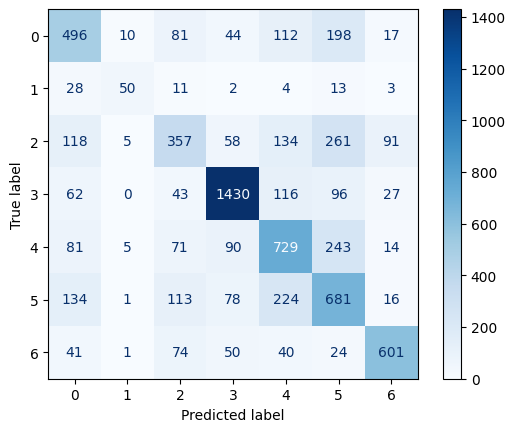

-----------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.52      0.52      0.52       958
           1       0.69      0.45      0.55       111
           2       0.48      0.35      0.40      1024
           3       0.82      0.81      0.81      1774
           4       0.54      0.59      0.56      1233
           5       0.45      0.55      0.49      1247
           6       0.78      0.72      0.75       831

    accuracy                           0.61      7178
   macro avg       0.61      0.57      0.58      7178
weighted avg       0.61      0.61      0.60      7178



In [9]:
emotion_dict = {0: "Angry", 1: "Disgusted", 2: "Fearful", 3: "Happy", 4: "Neutral", 5: "Sad", 6: "Surprised"}

json_file = open('emotion_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
emotion_model = model_from_json(loaded_model_json)

emotion_model.load_weights("emotion_model.weights.h5")
print("Loaded model from disk")

test_data_gen = ImageDataGenerator(rescale=1./255)

test_generator = test_data_gen.flow_from_directory(
        'test',
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical',
        shuffle=False)

y_true = test_generator.classes

predictions = emotion_model.predict(test_generator)

y_pred = np.argmax(predictions, axis=1)

print("-----------------------------------------------------------------")
c_matrix = confusion_matrix(y_true, y_pred)
print(c_matrix)
cm_display = ConfusionMatrixDisplay(confusion_matrix=c_matrix, display_labels=emotion_dict)
cm_display.plot(cmap=plt.cm.Blues)
plt.show()

print("-----------------------------------------------------------------")
print(classification_report(y_true, y_pred))

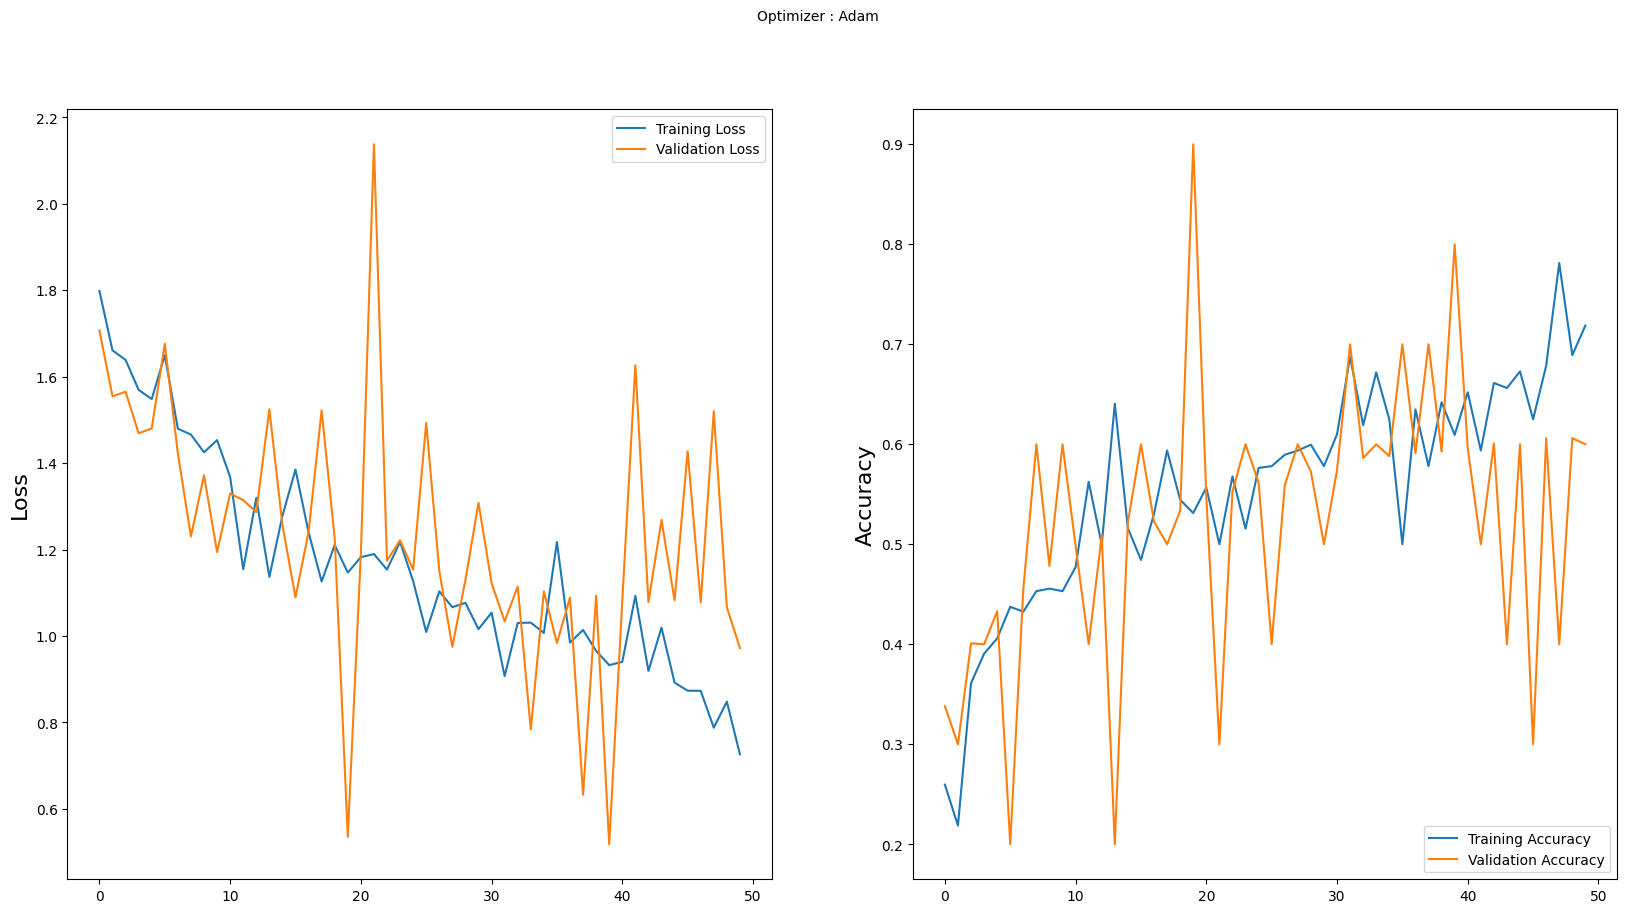

In [10]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(emotion_model_info.history['loss'], label='Training Loss')
plt.plot(emotion_model_info.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(emotion_model_info.history['accuracy'], label='Training Accuracy')  # Changed 'acc' to 'accuracy'
plt.plot(emotion_model_info.history['val_accuracy'], label='Validation Accuracy')  # Changed 'val_acc' to 'val_accuracy'
plt.legend(loc='lower right')
plt.show()